# Univariate Linear Regression using Numpy

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

np.random.seed(42)

## Load the dataset

In [0]:
dataset = load_boston()
# print(dataset['DESCR'])

In [0]:
features = dataset.data
y = dataset.target[:,np.newaxis] 

# np.newaxis increases the dimension of the existing array which in this
# context transforms `y` from a 1-dimensional array to 2-dimensional array

## Visualizing the Dataset

### RM - average number of rooms per dwelling

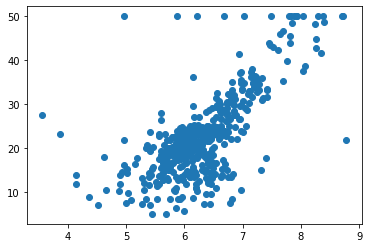

In [4]:
RM = features[:,5] 
plt.scatter(RM,y)

### DIS - weighted distances to five Boston employment centres

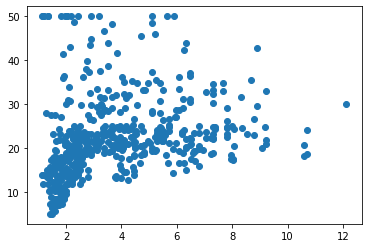

In [5]:
DIS = features[:,7] 
plt.scatter(DIS,y)

## Modelling


### Hypothesis



**Hypothesis** is a function that takes the input features $X$ and outputs a prediction or an estimated value of $y.$ We used a linear function expressed as 

$h(x) = \theta_0 + \theta_1x$ 

because we only have one feature to fit a function where $\theta_0$ is the bias, $\theta_1$ is the weights, and $x$ is the input features.

With knowledge of linear algebra, we can simplify the expression above as 

$h = X\cdot\theta$

to use matrix operations.

To do so we must create a matrix $X$ where in the first column consists of `np.ones` and the second column consists of the features RM or the average number of rooms per dwelling.

In [0]:
X = np.ones((RM.shape[0],2))
X[:,1:] = RM[:,np.newaxis]

Now we need to set random values for $\theta$.

In [7]:
theta = np.random.randn(2)
theta = theta[:,np.newaxis]

print(theta)

[[ 0.49671415]
 [-0.1382643 ]]


In [8]:
print(X.shape, theta.shape)

(506, 2) (2, 1)


Create the hypothesis function as a method

In [0]:
def hypothesis(X,theta):
  return np.dot(X,theta)

### Cost Function

This function measures the performance of the model. In univariate linear regression, the function is expressed as

$ J(\theta_0,\theta_1) = \frac{1}{2m}\displaystyle\sum_{i = 1}^{m}(\hat{y_i}-y_i)^2 $

or also known as the Mean Squared Error (MSE).

Breaking down the equation:  

1.   $\hat{y} \longrightarrow$ output of the hypothesis $h(x)$ (purple dots)
2.   $y \longrightarrow$ the labels (point that sits on the line)
3.   $(\hat{y_i}-y_i)^2 \longrightarrow$ For each point, subtract the hypothesis from the labels and square its result. 
4.   $\frac{1}{2m}\displaystyle\sum_{i = 1}^{m}(\hat{y_i}-y_i)^2 \longrightarrow$ Find the sum for each squared difference and divide it by the total number of examples.







![alt text](https://cdn-media-1.freecodecamp.org/images/MNskFmGPKuQfMLdmpkT-X7-8w2cJXulP3683)

In [0]:
def cost_function(X,y,theta):
  return (1 / (2*X.shape[0])) * sum(np.square(hypothesis(X,theta)-y))

### Gradient Descent

Recall the cost function

 $ J(\theta_0,\theta_1) = \frac{1}{m}\displaystyle\sum_{i = 1}^{m}(y_i-\hat{y_i})^2 $

 we need to expand it in order to see what steps must be followed in order to conduct the gradient descent.

 $ J(\theta_0,\theta_1) = \frac{1}{m}\displaystyle\sum_{i = 1}^{m}(y_i-(\theta_0 + \theta_1x_i))^2 $

 To get the partial derivative of both $\theta_0$ and $\theta_1$, we use the chain rule.

 $\frac{\partial J}{\partial \theta_0} = \frac{2}{m}\displaystyle\sum_{i = 1}^{m}-(y_i-(\theta_0 + \theta_1x_i))$

  $\frac{\partial J}{\partial \theta_1} = \frac{2}{m}\displaystyle\sum_{i = 1}^{m}-x\cdot(y_i-(\theta_0 + \theta_1x_i))$

In [0]:
# self implementation of gradient descent from scratch
def gradient_descent_from_scratch(X,y,theta,alpha,iterations):
  for i in range(iterations):

    predict_0 = 0
    predict_1 = 1
    for j in range(len(X)):
      predict_0 += ((theta[0] + (theta[1]*X[j][1])) - y[j])
      predict_1 += (X[j][1])*((theta[0] + (theta[1]*X[j][1])) - y[j])
    temp_0 = theta[0] - alpha * 1/len(X) * predict_0
    temp_1 = theta[1] - alpha * 1/len(X) * predict_1

    theta[0] = temp_0
    theta[1] = temp_1

    if i % 100 == 0:
      print(f'Error in {i}th iteration: {cost_function(X,y,theta)}')
      print(theta[0],theta[1])

In [12]:
iterations = 1000
alpha = 0.02
gradient_descent_from_scratch(X,y,theta,alpha,iterations)

Error in 0th iteration: [38.63594478]
[0.95481481] [2.83174506]
Error in 100th iteration: [29.29498895]
[0.20915599] [3.61878302]
Error in 200th iteration: [28.94327552]
[-0.61910074] [3.74898917]
Error in 300th iteration: [28.60807321]
[-1.42767541] [3.87610121]
Error in 400th iteration: [28.28860675]
[-2.21703575] [4.00019266]
Error in 500th iteration: [27.98413731]
[-2.98763835] [4.12133529]
Error in 600th iteration: [27.69396073]
[-3.73992895] [4.23959919]
Error in 700th iteration: [27.41740593]
[-4.4743427] [4.35505275]
Error in 800th iteration: [27.15383333]
[-5.19130442] [4.46776277]
Error in 900th iteration: [26.9026334]
[-5.89122882] [4.57779443]


In [0]:
# Self implementation of gradient descent via matrix operations
def gradient_descent(X,y,theta,alpha,iterations):
  for i in range(iterations):
    predictions = hypothesis(X,theta)
    theta = theta - alpha * (1/X.shape[0]) * X.T.dot((predictions - y))

    if i % 100 == 0:
      print(f'Error in {i}th iteration: {cost_function(X,y,theta)}')
      print(theta[0],theta[1])

In [14]:
np.random.seed(42)
theta = np.random.randn(2)
theta = theta[:,np.newaxis]
iterations = 1000
alpha = 0.02
gradient_descent(X,y,theta,alpha,iterations)

Error in 0th iteration: [38.63488335]
[0.95481481] [2.83178458]
Error in 100th iteration: [29.29472885]
[0.20855825] [3.61892521]
Error in 200th iteration: [28.94277624]
[-0.62028331] [3.74922331]
Error in 300th iteration: [28.60735195]
[-1.42942892] [3.8764251]
Error in 400th iteration: [28.28767977]
[-2.21934663] [4.00060417]
Error in 500th iteration: [27.98301995]
[-2.99049336] [4.12183234]
Error in 600th iteration: [27.69266749]
[-3.74331515] [4.24017975]
Error in 700th iteration: [27.41595049]
[-4.47824748] [4.35571483]
Error in 800th iteration: [27.1522286]
[-5.19571545] [4.46850444]
Error in 900th iteration: [26.90089155]
[-5.89613407] [4.57861379]


In [0]:
# This implementation was suggested by Robert
def gradient_descent_vector(X,y,theta,alpha,iterations):
  X = X[:,1]
  X = X[:,np.newaxis]

  weights = theta[1]
  weights = weights[:,np.newaxis]
  weights

  bias = theta[0]
  bias = bias[:,np.newaxis]
  bias
  for i in range(iterations):
    y_predictions = np.dot(X,weights) + bias

    dw = (1 / len(X)) * np.dot(X.T, (y_predictions - y))
    db = (1 / len(X)) * sum((y_predictions - y))

    weights -= alpha * dw
    bias -= alpha * db

    theta[1] = weights
    theta[0] = bias

    if i % 100 == 0:
      cost = (1 / (2*len(X))) * sum(np.square((np.dot(X,weights) + bias)-y))
      print(f'Error in {i}th iteration: {cost}')
      print(theta[0],theta[1])


In [21]:
np.random.seed(42)
theta = np.random.randn(2)
theta = theta[:,np.newaxis]
iterations = 1000
alpha = 0.02
gradient_descent_vector(X,y,theta,alpha,iterations)

Error in 0th iteration: [38.63488335]
[0.95481481] [2.83178458]
Error in 100th iteration: [29.29472885]
[0.20855825] [3.61892521]
Error in 200th iteration: [28.94277624]
[-0.62028331] [3.74922331]
Error in 300th iteration: [28.60735195]
[-1.42942892] [3.8764251]
Error in 400th iteration: [28.28767977]
[-2.21934663] [4.00060417]
Error in 500th iteration: [27.98301995]
[-2.99049336] [4.12183234]
Error in 600th iteration: [27.69266749]
[-3.74331515] [4.24017975]
Error in 700th iteration: [27.41595049]
[-4.47824748] [4.35571483]
Error in 800th iteration: [27.1522286]
[-5.19571545] [4.46850444]
Error in 900th iteration: [26.90089155]
[-5.89613407] [4.57861379]
